The New Build Premium: A UK Housing Market Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Exploratory Data Analysis

In [2]:
#Average Price of Houses

data = pd.read_csv('./Data/Average-price-seasonally-adjusted-2025-05.csv')


In [11]:
data.head(-5)

,Date,Region_Name,Area_Code,Average_Price_SA,Year
0,1995-01-01,England,E92000001,50619,1995
1,1995-01-01,Wales,W92000004,40567,1995
2,1995-01-01,London,E12000007,79601,1995
3,1995-01-01,East of England,E12000006,56587,1995
4,1995-01-01,North West,E12000002,41392,1995
...,...,...,...,...,...
5129,2025-05-01,Yorkshire and The Humber,E12000003,204849,2025
5130,2025-05-01,East Midlands,E12000004,243202,2025
5131,2025-05-01,West Midlands Region,E12000005,244999,2025
5132,2025-05-01,East of England,E12000006,341018,2025


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5139 entries, 0 to 5138
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              5139 non-null   datetime64[ns]
 1   Region_Name       5139 non-null   object        
 2   Area_Code         5139 non-null   object        
 3   Average_Price_SA  5139 non-null   int64         
 4   Year              5139 non-null   int32         
dtypes: datetime64[ns](1), int32(1), int64(1), object(2)
memory usage: 180.8+ KB


In [ ]:
#extract year from date

data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data['Year'] = data['Date'].dt.year

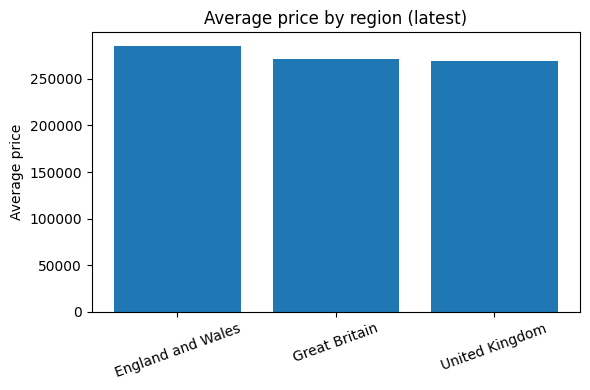

In [12]:
last3 = data.tail(3)

plt.figure(figsize=(6, 4))
plt.bar(last3["Region_Name"], last3["Average_Price_SA"])
plt.xticks(rotation=20)
plt.ylabel("Average price")
plt.title("Average price by region (latest)")
plt.tight_layout()
plt.show()